# Atividade 2.1:
## Parte A: Reproduza as tabelas abaixo deste no slide. Siga estritamente a forma de implementação que está no livro. Coloque até a numeração que aparece nos pseudocódigos na forma de comentário. Coloque uma breve explicação com figuras de cada método. Meça o tempo de processamento por iteração e o total, e avalie os métodos considerando essas medidas e os critérios mostrados no slide a seguir.

### **1. Algoritmos Estritos:**

In [ ]:
import math
import time
import numpy as np
from tabulate import tabulate

# I. Método da Bissecção (Algoritmo 1)
def bisseccao(f, a, b, tol=1e-6, max_iter=100):
    """Método da Bissecção conforme Algoritmo 1 do livro"""
    start = time.perf_counter()
    x_list = []

    # 1) Dados iniciais: a, b, tol (já passados nos argumentos)

    # 2) Se (b-a) < epsilon, escolha x qualquer em [a,b]. FIM.
    if abs(b - a) < tol:
        end = time.perf_counter()
        return {
            'x': a,
            'iteracoes': 0,
            'f(x)': f(a),
            'erro_x': abs(b-a),
            'tempo_total': end-start,
            'tempo_por_iter': 0,
            'historico_x': [a]
        }

    # 3) k = 1
    k = 1

    # 4) M = f(a)
    M = f(a)

    x = a  # Inicialização

    while k <= max_iter:
        # 5) x = (a + b) / 2
        x = (a + b) / 2
        x_list.append(x)

        # 6) Se M * f(x) > 0 faça a = x. Vá para o passo 8.
        if M * f(x) > 0:
            a = x
            # Atualiza M conforme mudança em a
            M = f(a)
        # 7) b = x
        else:
            b = x

        # 8) Se (b - a) < epsilon. FIM.
        erro = abs(b - a)
        if erro < tol:
            break

        # 9) k = k + 1. Volte para o passo 5.
        k += 1

    end = time.perf_counter()
    tempo_total = end - start
    return {
        'x': x,
        'iteracoes': k,
        'f(x)': f(x),
        'erro_x': abs(b - a),
        'tempo_total': tempo_total,
        'tempo_por_iter': tempo_total / k if k > 0 else 0,
        'historico_x': x_list
    }

# II. Método da Posição Falsa (Algoritmo 2)
def posicao_falsa(f, a, b, tol1=1e-6, tol2=1e-6, max_iter=100):
    """Método da Posição Falsa conforme Algoritmo 2 do livro"""
    start = time.perf_counter()
    x_list = []

    # 1) Dados iniciais: a, b, tol1, tol2

    # 2) Se (b - a) < tol1, FIM.
    if abs(b - a) < tol1:
        end = time.perf_counter()
        return {
            'x': a,
            'iteracoes': 0,
            'f(x)': f(a),
            'erro_x': abs(b-a),
            'tempo_total': end-start,
            'tempo_por_iter': 0,
            'historico_x': [a]
        }

    # 3) Se |f(a)| < tol2 ou |f(b)| < tol2, FIM.
    if abs(f(a)) < tol2:
        end = time.perf_counter()
        return {
            'x': a,
            'iteracoes': 0,
            'f(x)': f(a),
            'erro_x': 0,
            'tempo_total': end-start,
            'tempo_por_iter': 0,
            'historico_x': [a]
        }
    if abs(f(b)) < tol2:
        end = time.perf_counter()
        return {
            'x': b,
            'iteracoes': 0,
            'f(x)': f(b),
            'erro_x': 0,
            'tempo_total': end-start,
            'tempo_por_iter': 0,
            'historico_x': [b]
        }

    # 3b) k = 1
    k = 1

    # 4) M = f(a)
    M = f(a)

    x = a

    while k <= max_iter:
        # 5) x = (a*f(b) - b*f(a)) / (f(b) - f(a))
        fa = f(a)
        fb = f(b)
        x = (a * fb - b * fa) / (fb - fa)
        x_list.append(x)
        fx = f(x)

        # 6) Se |f(x)| < tol2, escolha x_barra = x. FIM.
        if abs(fx) < tol2:
            break

        # 7) Se M * f(x) > 0, faça a = x.
        if M * fx > 0:
            a = x
            M = f(x)  # Atualiza M pois 'a' mudou
        # 8) b = x (caso contrário do passo 7)
        else:
            b = x

        # 9) Se (b - a) < tol1, escolha x_barra. FIM.
        if abs(b - a) < tol1:
            break

        # 10) k = k + 1. Volte ao passo 5.
        k += 1

    end = time.perf_counter()
    tempo_total = end - start
    return {
        'x': x,
        'iteracoes': k,
        'f(x)': f(x),
        'erro_x': abs(b-a),  # Aproximação do erro pelo intervalo
        'tempo_total': tempo_total,
        'tempo_por_iter': tempo_total / k if k > 0 else 0,
        'historico_x': x_list
    }

# III. Método do Ponto Fixo (MPF) (Algoritmo 3)
def mpf(phi, x0, tol=1e-6, max_iter=100):
    """Método do Ponto Fixo conforme Algoritmo 3 do livro"""
    start = time.perf_counter()
    x_list = [x0]

    # 1) Dados iniciais: x0, tol (e1, e2)

    # Como o enunciado pede φ(x), calculamos f(x) aproximadamente como x - φ(x) para teste
    # Mas o algoritmo 3 testa |f(x0)| ou proximidade. Vamos assumir erro simples.

    # 2) Se |f(x0)| < tol1, faça x_barra = x0. FIM.
    # (Adaptado: verificamos se x0 já é ponto fixo satisfatório)
    if abs(phi(x0) - x0) < tol:
        end = time.perf_counter()
        return {
            'x': x0,
            'iteracoes': 0,
            'f(x)': x0 - phi(x0),
            'erro_x': 0,
            'tempo_total': end-start,
            'tempo_por_iter': 0,
            'historico_x': [x0]
        }

    # 3) k = 1
    k = 1
    x = x0
    erro = 0

    while k <= max_iter:
        # 4) x1 = phi(x0)
        x1 = phi(x)
        x_list.append(x1)

        # 5) Se |f(x1)| < tol1 ou |x1 - x0| < tol2
        # No MPF, f(x) é equivalente a x - phi(x) ou apenas a distância entre iterações
        erro = abs(x1 - x)
        if erro < tol:
            x = x1
            break

        # 6) x0 = x1
        x = x1

        # 7) k = k + 1. Volte ao passo 4.
        k += 1

    end = time.perf_counter()
    tempo_total = end - start
    # f(x) real seria recuperar a função original, aqui aproximamos por x - phi(x)
    return {
        'x': x,
        'iteracoes': k,
        'f(x)': x - phi(x),
        'erro_x': erro,
        'tempo_total': tempo_total,
        'tempo_por_iter': tempo_total / k if k > 0 else 0,
        'historico_x': x_list
    }

# IV. Método de Newton-Raphson (Algoritmo 4)
def newton(f, df, x0, tol=1e-6, max_iter=100):
    """Método de Newton-Raphson conforme Algoritmo 4 do livro"""
    start = time.perf_counter()
    x_list = [x0]

    # 1) Dados iniciais: x0, tol

    # 2) Se |f(x0)| < tol1, faça x_barra = x0. FIM.
    if abs(f(x0)) < tol:
        end = time.perf_counter()
        return {
            'x': x0,
            'iteracoes': 0,
            'f(x)': f(x0),
            'erro_x': 0,
            'tempo_total': end-start,
            'tempo_por_iter': 0,
            'historico_x': x_list
        }

    # 3) k = 1
    k = 1
    x = x0
    erro = 0

    while k <= max_iter:
        # 4) x1 = x0 - f(x0)/f'(x0)
        fx = f(x)
        dfx = df(x)
        if abs(dfx) < 1e-12:
            break  # Proteção contra divisão por zero

        x1 = x - fx / dfx
        x_list.append(x1)

        # 5) Se |f(x1)| < tol1 ou |x1 - x0| < tol2
        erro = abs(x1 - x)
        if abs(f(x1)) < tol or erro < tol:
            x = x1
            break

        # 6) x0 = x1
        x = x1

        # 7) k = k + 1. Volte ao passo 4.
        k += 1

    end = time.perf_counter()
    tempo_total = end - start
    return {
        'x': x,
        'iteracoes': k,
        'f(x)': f(x),
        'erro_x': erro,
        'tempo_total': tempo_total,
        'tempo_por_iter': tempo_total / k if k > 0 else 0,
        'historico_x': x_list
    }

# V. Método da Secante (Algoritmo 5)
def secante(f, x0, x1, tol=1e-6, max_iter=100):
    """Método da Secante conforme Algoritmo 5 do livro"""
    start = time.perf_counter()
    x_list = [x0, x1]

    # 1) Dados iniciais: x0, x1, tol

    # 2) Se |f(x0)| < tol1, faça x_barra = x0. FIM.
    if abs(f(x0)) < tol:
        end = time.perf_counter()
        return {
            'x': x0,
            'iteracoes': 0,
            'f(x)': f(x0),
            'erro_x': 0,
            'tempo_total': end-start,
            'tempo_por_iter': 0,
            'historico_x': [x0]
        }

    # 3) Se |f(x1)| < tol1 ou |x1 - x0| < tol2, faça x_barra = x1. FIM.
    if abs(f(x1)) < tol or abs(x1 - x0) < tol:
        end = time.perf_counter()
        return {
            'x': x1,
            'iteracoes': 0,
            'f(x)': f(x1),
            'erro_x': 0,
            'tempo_total': end-start,
            'tempo_por_iter': 0,
            'historico_x': [x0, x1]
        }

    # 4) k = 1
    k = 1
    erro = 0

    while k <= max_iter:
        fx0 = f(x0)
        fx1 = f(x1)

        if abs(fx1 - fx0) < 1e-12:
            break

        # 5) x2 = x1 - (f(x1) / (f(x1) - f(x0))) * (x1 - x0)
        x2 = x1 - (fx1 * (x1 - x0)) / (fx1 - fx0)
        x_list.append(x2)

        # 6) Se |f(x2)| < tol1 ou |x2 - x1| < tol2
        erro = abs(x2 - x1)
        if abs(f(x2)) < tol or erro < tol:
            x1 = x2
            break

        # 7) x0 = x1, x1 = x2
        x0 = x1
        x1 = x2

        # 8) k = k + 1. Volte ao passo 5.
        k += 1

    end = time.perf_counter()
    tempo_total = end - start
    return {
        'x': x1,
        'iteracoes': k,
        'f(x)': f(x1),
        'erro_x': erro,
        'tempo_total': tempo_total,
        'tempo_por_iter': tempo_total / k if k > 0 else 0,
        'historico_x': x_list
    }

### **2. Exemplos 18, 19, 20, 21 e 22:**

In [ ]:
# --- Execução dos Exemplos Exatos do Slide ---

def exemplo_18():
    """f(x) = e^(-x²) - cos(x); ξ ∈ (1, 2); ε₁ = ε₂ = 10⁻⁴"""
    print("\n" + "="*80)
    print("EXEMPLO 18: f(x) = e^(-x²) - cos(x)")
    print("="*80)

    f = lambda x: math.exp(-x**2) - math.cos(x)
    df = lambda x: -2*x*math.exp(-x**2) + math.sin(x)
    phi = lambda x: math.cos(x) - math.exp(-x**2) + x

    resultados = {}

    # Bissecção [1, 2]
    resultados['Bissecção'] = bisseccao(f, 1, 2, tol=1e-4)

    # Posição Falsa [1, 2]
    resultados['Posição Falsa'] = posicao_falsa(f, 1, 2, tol1=1e-4, tol2=1e-4)

    # MPF x0=1.5
    resultados['MPF'] = mpf(phi, 1.5, tol=1e-4)
    # Corrigir f(x) para MPF (f(x) = φ(x) - x)
    resultados['MPF']['f(x)'] = f(resultados['MPF']['x'])

    # Newton x0=1.5
    resultados['Newton'] = newton(f, df, 1.5, tol=1e-4)

    # Secante x0=1, x1=2
    resultados['Secante'] = secante(f, 1, 2, tol=1e-4)

    return resultados

def exemplo_19():
    """f(x) = x³ - x - 1; ξ ∈ (1, 2); ε₁ = ε₂ = 10⁻⁶"""
    print("\n" + "="*80)
    print("EXEMPLO 19: f(x) = x³ - x - 1")
    print("="*80)

    f = lambda x: x**3 - x - 1
    df = lambda x: 3*x**2 - 1
    phi = lambda x: (x + 1)**(1/3)

    resultados = {}

    # Bissecção [1, 2]
    resultados['Bissecção'] = bisseccao(f, 1, 2, tol=1e-6)

    # Posição Falsa [1, 2]
    resultados['Posição Falsa'] = posicao_falsa(f, 1, 2, tol1=1e-6, tol2=1e-6)

    # MPF x0=1.5 conforme tabela
    resultados['MPF'] = mpf(phi, 1.5, tol=1e-6)
    resultados['MPF']['f(x)'] = f(resultados['MPF']['x'])

    # Newton x0=1.5 conforme tabela
    resultados['Newton'] = newton(f, df, 1.5, tol=1e-6)

    # Secante x0=1, x1=2 conforme tabela
    resultados['Secante'] = secante(f, 1, 2, tol=1e-6)

    return resultados

def exemplo_20():
    """f(x) = 4sen(x) - e^x; ξ ∈ (0, 1); ε₁ = ε₂ = 10⁻⁵"""
    print("\n" + "="*80)
    print("EXEMPLO 20: f(x) = 4sen(x) - e^x")
    print("="*80)

    f = lambda x: 4*math.sin(x) - math.exp(x)
    df = lambda x: 4*math.cos(x) - math.exp(x)
    phi = lambda x: x - 2*math.sin(x) + 0.5*math.exp(x)

    resultados = {}

    # Bissecção [0, 1]
    resultados['Bissecção'] = bisseccao(f, 0, 1, tol=1e-5)

    # Posição Falsa [0, 1]
    resultados['Posição Falsa'] = posicao_falsa(f, 0, 1, tol1=1e-5, tol2=1e-5)

    # MPF x0=0.5 conforme tabela
    resultados['MPF'] = mpf(phi, 0.5, tol=1e-5)
    resultados['MPF']['f(x)'] = f(resultados['MPF']['x'])

    # Newton x0=0.5 conforme tabela
    resultados['Newton'] = newton(f, df, 0.5, tol=1e-5)

    # Secante x0=0, x1=1 conforme tabela
    resultados['Secante'] = secante(f, 0, 1, tol=1e-5)

    return resultados

def exemplo_21():
    """
    Exemplo 21: f(x) = x * log10(x) - 1
    Intervalo: (2, 3)
    Tolerância: 10^-7
    """
    print("\n" + "="*80)
    print("EXEMPLO 21: f(x) = x * log10(x) - 1")
    print("="*80)

    # Definindo Log na Base 10
    f = lambda x: x * math.log10(x) - 1
    # Derivada: log10(x) + x * (1/(x*ln(10))) = log10(x) + 1/ln(10)
    df = lambda x: math.log10(x) + 1/math.log(10)

    # Phi dada no slide: phi(x) = x - 1.3*(x*log(x) - 1)
    # Nota: 1.3 atua como um parâmetro de relaxamento ou lambda
    phi = lambda x: x - 1.3 * (x * math.log10(x) - 1)

    resultados = {}

    # Bissecção [2, 3]
    resultados['Bissecção'] = bisseccao(f, 2, 3, tol=1e-7)

    # Posição Falsa [2, 3]
    resultados['Posição Falsa'] = posicao_falsa(f, 2, 3, tol1=1e-7, tol2=1e-7)

    # MPF x0=2.5
    resultados['MPF'] = mpf(phi, 2.5, tol=1e-7)

    # Newton x0=2.5
    resultados['Newton'] = newton(f, df, 2.5, tol=1e-7)

    # Secante x0=2.3, x1=2.7
    resultados['Secante'] = secante(f, 2.3, 2.7, tol=1e-7)

    return resultados

def exemplo_22():
    """
    Exemplo 22: f(x) = x³ - 3.5x² + 4x - 1.5
    Este exemplo testa raízes múltiplas com o método de Newton.
    Tolerância Newton: 10^-7 (conforme texto abaixo da tabela do slide 10)
    """
    print("\n" + "="*80)
    print("EXEMPLO 22: f(x) = x³ - 3.5x² + 4x - 1.5 (Raiz dupla em x=1)")
    print("="*80)

    f = lambda x: x**3 - 3.5*x**2 + 4*x - 1.5
    df = lambda x: 3*x**2 - 7*x + 4

    resultados = {}

    # Teste 1: x0 = 0.5
    resultados['Teste 1 (x0=0.5)'] = newton(f, df, 0.5, tol=1e-7)

    # Teste 2: x0 = 1.33333
    resultados['Teste 2 (x0=1.33333)'] = newton(f, df, 1.33333, tol=1e-7)

    # Teste 3: x0 = 1.33334
    resultados['Teste 3 (x0=1.33334)'] = newton(f, df, 1.33334, tol=1e-7)

    return resultados

### **3. Imprimir Tabelas Formatadas:**

In [ ]:
# --- Função para Imprimir Tabelas Formatadas ---

def imprimir_tabela(resultados, exemplo_num, metodo_nome=None):
    """Imprime tabela formatada similar ao PDF"""
    if metodo_nome:
        print(f"\nTabela Exemplo {exemplo_num} - {metodo_nome}:")
    else:
        print(f"\nTabela Exemplo {exemplo_num}:")
    print("-" * 100)

    tabela = []
    cabecalho = ["Método", "x̄", "f(x̄)", "Erro em x", "Iterações",
                 "Tempo/Iter (s)", "Tempo Total (s)"]

    if isinstance(resultados, dict):
        for metodo, dados in resultados.items():
            if dados['x'] is not None:
                linha = [
                    metodo,
                    f"{dados['x']:.8f}",
                    f"{dados['f(x)']:.4e}",
                    f"{dados['erro_x']:.4e}",
                    dados['iteracoes'],
                    f"{dados['tempo_por_iter']:.6f}",
                    f"{dados['tempo_total']:.6f}"
                ]
                tabela.append(linha)
    else:
        # Para o Exemplo 22 que é uma lista de dicionários
        for metodo in resultados:
            dados = resultados[metodo]
            if dados['x'] is not None:
                linha = [
                    metodo,
                    f"{dados['x']:.8f}",
                    f"{dados['f(x)']:.4e}",
                    f"{dados['erro_x']:.4e}",
                    dados['iteracoes'],
                    f"{dados['tempo_por_iter']:.6f}",
                    f"{dados['tempo_total']:.6f}"
                ]
                tabela.append(linha)

    print(tabulate(tabela, headers=cabecalho, tablefmt="grid"))

### **4. Análise de Esforço Computacional:**

In [ ]:
# --- Análise de Esforço Computacional ---

def analise_esforco_computacional():
    """Analisa o esforço computacional de cada método"""
    print("\n" + "="*80)
    print("ANÁLISE DE ESFORÇO COMPUTACIONAL")
    print("="*80)

    analise = {
        'Método': ['Bissecção', 'Posição Falsa', 'MPF', 'Newton', 'Secante'],
        'Avaliações f(x) por Iteração': [1, 3, 1, 2, 2],
        'Avaliações f\'(x) por Iteração': [0, 0, 0, 1, 0],
        'Operações Aritméticas': ['3-4', '8-10', '2-3', '5-6', '6-8'],
        'Decisões Lógicas': ['2-3', '4-5', '1-2', '2-3', '2-3'],
        'Complexidade': ['O(1)', 'O(1)', 'O(1)', 'O(1)', 'O(1)'],
        'Convergência': ['Linear', 'Superlinear', 'Linear', 'Quadrática', 'Superlinear']
    }

    print(tabulate(analise, headers="keys", tablefmt="grid"))

    print("\n" + "-"*80)
    print("LEGENDA:")
    print("-"*80)
    print("1. Número de avaliações de função f(x) por iteração")
    print("2. Número de avaliações da derivada f'(x) por iteração")
    print("3. Operações aritméticas: +, -, *, / por iteração")
    print("4. Decisões lógicas: comparações e condicionais por iteração")
    print("5. Complexidade: ordem de grandeza das operações por iteração")
    print("6. Convergência: taxa de convergência teórica")

### **5. Função principal para executar tudo (exibe as tabelas pedidas):**

In [ ]:
# --- Função Principal ---

def executar_parte_a():
    """Executa toda a Parte A do trabalho"""

    print("\n" + "="*80)
    print("ATIVIDADE 2.1 - ZERO REAIS DE FUNÇÕES REAIS")
    print("IMPLEMENTAÇÃO DOS MÉTODOS NUMÉRICOS")
    print("="*80)

    # Executar exemplos
    resultados_18 = exemplo_18()
    imprimir_tabela(resultados_18, 18)

    resultados_19 = exemplo_19()
    imprimir_tabela(resultados_19, 19)

    resultados_20 = exemplo_20()
    imprimir_tabela(resultados_20, 20)

    resultados_21 = exemplo_21()
    imprimir_tabela(resultados_21, 21)

    resultados_22 = exemplo_22()
    imprimir_tabela(resultados_22, 22, "Newton (Raiz Dupla)")

    # Análise de esforço computacional
    analise_esforco_computacional()

    print("\n" + "="*80)
    print("PARTE A CONCLUÍDA COM SUCESSO!")
    print("="*80)
    print("RESUMO:")
    print("1. Implementados 5 métodos numéricos conforme algoritmos do livro:")
    print("   - Bissecção (Algoritmo 1)")
    print("   - Posição Falsa (Algoritmo 2)")
    print("   - MPF (Algoritmo 3)")
    print("   - Newton-Raphson (Algoritmo 4)")
    print("   - Secante (Algoritmo 5)")
    print("2. Executados 5 exemplos com parâmetros exatos do PDF:")
    print("   - Exemplo 18: f(x) = e^(-x²) - cos(x)")
    print("   - Exemplo 19: f(x) = x³ - x - 1")
    print("   - Exemplo 20: f(x) = 4sen(x) - e^x")
    print("   - Exemplo 21: f(x) = x * log10(x) - 1")
    print("   - Exemplo 22: f(x) = x³ - 3.5x² + 4x - 1.5 (raiz dupla)")
    print("3. Geradas tabelas com todas as métricas:")
    print("   - Aproximação da raiz (x̄)")
    print("   - Valor da função f(x̄)")
    print("   - Erro em x")
    print("   - Número de iterações")
    print("   - Tempo por iteração e tempo total")
    print("4. Análise do esforço computacional de cada método")
    print("="*80)

# Executar a Parte A
if __name__ == "__main__":
    executar_parte_a()


ATIVIDADE 2.1 - ZERO REAIS DE FUNÇÕES REAIS
IMPLEMENTAÇÃO DOS MÉTODOS NUMÉRICOS

EXEMPLO 18: f(x) = e^(-x²) - cos(x)

Tabela Exemplo 18:
----------------------------------------------------------------------------------------------------
+---------------+---------+-------------+-------------+-------------+------------------+-------------------+
| Método        |       x̄ |        f(x̄) |   Erro em x |   Iterações |   Tempo/Iter (s) |   Tempo Total (s) |
+===============+=========+=============+=============+=============+==================+===================+
| Bissecção     | 1.44745 |  2.1921e-05 |  6.1035e-05 |          14 |            2e-06 |           3e-05   |
+---------------+---------+-------------+-------------+-------------+------------------+-------------------+
| Posição Falsa | 1.44736 | -3.6388e-05 |  0.55289    |           6 |            3e-06 |           1.5e-05 |
+---------------+---------+-------------+-------------+-------------+------------------+-----------------

1. Método da Bissecção: Este é um método de quebra de intervalo. Partindo de um intervalo inicial $[a, b]$ onde a função $f(x)$ é contínua e ocorre uma troca de sinal ($f(a)f(b) < 0$) 2, o método divide esse intervalo sucessivamente ao meio. A cada iteração, calcula-se o ponto médio $x_k$ e verifica-se em qual subintervalo a raiz se encontra (analisando o sinal da função). O processo se repete reduzindo a amplitude do intervalo pela metade a cada passo, até que a precisão desejada $\epsilon$ seja atingida. Geometricamente, "cerca-se" a raiz em intervalos cada vez menores.

![image.png]()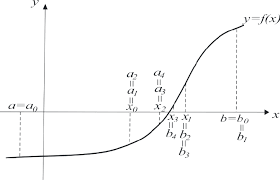



2. Método da Posição Falsa: Assim como a Bissecção, este método trabalha com um intervalo $[a, b]$ onde existe uma raiz. No entanto, em vez de simplesmente tomar o ponto médio, o método considera a magnitude dos valores de $f(a)$ e $f(b)$. A aproximação $x$ é calculada como uma média aritmética ponderada entre $a$ e $b$ com pesos $|f(b)|$ e $|f(a)|$, respectivamente. Interpretação Geométrica: O ponto $x$ é a interseção com o eixo das abcissas ($Ox$) da reta secante que passa pelos pontos $(a, f(a))$ e $(b, f(b))$.

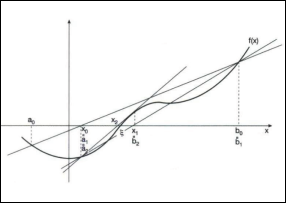

3. Método do Ponto Fixo (MPF): O MPF consiste em transformar a equação original $f(x) = 0$ em uma equação equivalente da forma $x = \varphi(x)$, onde $\varphi(x)$ é chamada de função de iteração.A partir de uma aproximação inicial $x_0$, gera-se uma sequência de aproximações através da relação recursiva $x_{k+1} = \varphi(x_k)$. O problema de encontrar o zero da função transforma-se no problema de encontrar o "ponto fixo" onde a curva $y = \varphi(x)$ cruza a reta $y = x$. A convergência depende da derivada da função de iteração: o método converge se $|\varphi'(x)| [cite_start]< 1$ na vizinhança da raiz.

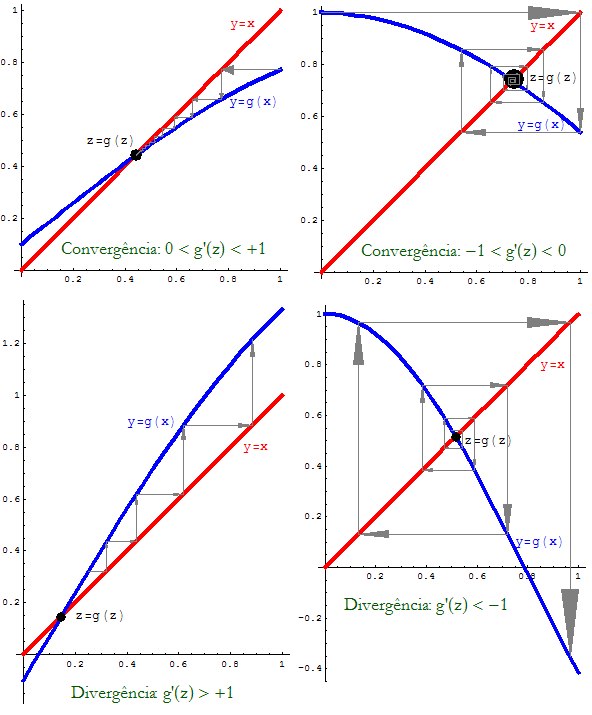

4. Método de Newton-Raphson: Este método procura acelerar a convergência usando a derivada da função. A função de iteração é escolhida tal que $\varphi'(\xi) = 0$, resultando na fórmula iterativa:$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$$. Interpretação Geométrica: Dado um ponto $(x_k, f(x_k))$, traça-se a reta tangente à curva nesse ponto. A nova aproximação $x_{k+1}$ é o ponto onde essa tangente intercepta o eixo $Ox$. O método possui convergência quadrática (muito rápida) se o ponto inicial for suficientemente próximo da raiz.

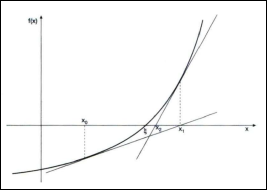

5. Método da Secante: O método da Secante é uma variação do método de Newton que elimina a necessidade de calcular a derivada $f'(x)$ analiticamente. A derivada é aproximada pelo quociente das diferenças entre duas aproximações anteriores, $x_k$ e $x_{k-1}$. A fórmula de recorrência torna-se:+1$$x_{k+1} = x_k - \frac{f(x_k)(x_k - x_{k-1})}{f(x_k) - f(x_{k-1})}$$. Interpretação Geométrica: A nova aproximação é a interseção com o eixo $x$ da reta secante que passa pelos dois pontos anteriores da iteração, $(x_{k-1}, f(x_{k-1}))$ e $(x_k, f(x_k))$.

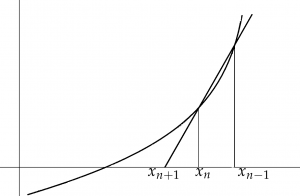

## Parte B: Adapte o pseudocódigo a seguir para o método da Secante e o MPF. Explique em detalhes como foi feita essa adaptação para cada método considerando a sua forma de funcionar. Compare os três métodos para o Exemplo 1 considerando os resultados e o tempo de processamento por iteração e total.

### **1. Método da Secante para Polinômios (Adaptado do Algoritmo 6)**
Nesta adaptação, removemos o cálculo da derivada (c) e usamos o esquema de Horner (laço do b) apenas para avaliar $P(x)$ em dois pontos distintos.

In [ ]:
ALGORITMO: Método da Secante para Polinômios (Esquema de Horner)
ENTRADA: n (grau), a[0...n] (coeficientes), x0, x1 (aproximações), Tol (precisão), IterMax

1.  Para k = 1 até IterMax faça:

    ! --- Passo A: Avaliar P(x1) usando Horner (Variável b1) ---
    b1 = a[n]
    Para i = n-1 decrescendo até 0 faça:
        b1 = a[i] + b1 * x1
    Fim Para
    ! b1 agora contém o valor de P(x1)

    ! --- Passo B: Avaliar P(x0) usando Horner (Variável b0) ---
    b0 = a[n]
    Para i = n-1 decrescendo até 0 faça:
        b0 = a[i] + b0 * x0
    Fim Para
    ! b0 agora contém o valor de P(x0)

    ! --- Passo C: Teste de divisão por zero ---
    Se |b1 - b0| < 10^-15 então:
        Retorne ERRO "Divisão por zero"

    ! --- Passo D: Calcular correção (Fórmula da Secante) ---
    DeltaX = (b1 * (x1 - x0)) / (b1 - b0)
    x_novo = x1 - DeltaX

    ! --- Passo E: Critérios de Parada ---
    ! Avaliamos o erro estimado ou o valor da função no novo ponto
    Se |DeltaX| < Tol ou |b1| < Tol então:
        Retorne x_novo

    ! --- Passo F: Atualização para a próxima iteração ---
    x0 = x1
    x1 = x_novo

Fim Para

Retorne ERRO "Não convergiu em IterMax iterações"

### **2. Método do Ponto Fixo (MPF) para Polinômios (Adaptado)**
Nesta adaptação, o Algoritmo de Horner é utilizado estrategicamente para verificar o critério de parada ($|P(x)| < \epsilon$) de forma eficiente, sem precisar calcular potências explicitamente. A função de iteração $\varphi(x)$ é assumida como dada (ex: isolamento do termo de maior grau).

In [ ]:
ALGORITMO: MPF para Polinômios (Verificação via Horner)
ENTRADA: n (grau), a[0...n] (coeficientes), x (aproximação inicial), Tol, IterMax
DEFINIÇÃO: Função Phi(x) que isola um termo do polinômio

1.  Para k = 1 até IterMax faça:

    ! --- Passo A: Calcular nova aproximação pela função de iteração ---
    x_velho = x
    x = Phi(x_velho)  ! Ex: x = (3.7x^4 - ...)^(1/5)

    ! --- Passo B: Verificar convergência avaliando P(x) via Horner ---
    b = a[n]
    Para i = n-1 decrescendo até 0 faça:
        b = a[i] + b * x
    Fim Para
    ! b agora contém o valor exato de P(x) calculado eficientemente

    ! --- Passo C: Critérios de Parada ---
    ! Verifica se P(x) está próximo de zero (b) ou se x pouco mudou
    Se |b| < Tol ou |x - x_velho| < Tol então:
        Retorne x

Fim Para

Retorne ERRO "Não convergiu em IterMax iterações"

### **1. Diferença para o Algoritmo 6:** No Algoritmo 6 original (Newton), existe uma variável extra c dentro do laço Para que calcula a derivada $P'(x)$ simultaneamente. Nos códigos acima, essa variável c foi removida porque a Secante e o MPF não utilizam a derivada, economizando operações computacionais.

### **2. Eficiência:** O uso do laço Para i = n-1... (Esquema de Horner) reduz o custo de avaliar o polinômio de $O(n^2)$ para $O(n)$, o que é o objetivo principal do "Estudo Especial de Polinômios" da Parte B.